## Web Crawing
- 웹 페이지에서 데이터를 수집하는 방법에 대해서 학습

### 웹크롤링 방법

#### 웹페이지의 종류
- 정적인 페이지 : 웹 브라우져에 화면이 한번 뜨면 이벤트에 의한 화면의 변경이 없는 페이지 
- 동적인 페이지 : 웹 브라우져에 화면이 뜨고 이벤트가 발생하면 서버에서 데이터를 가져와 화면을 변경하는 페이지

#### requests 이용
- 받아오는 문자열에 따라 두가지 방법으로 구분
    - json 문자열로 받아서 파싱하는 방법 : 주로 동적 페이지 크롤링할때 사용 
    - html 문자열로 받아서 파싱하는 방법 : 주로 정적 페이지 크롤링할때 사용
        
#### selenium 이용
- 브라우져를 직접 열어서 데이터를 받는 방법
- request를 막는 경우가 있기 때문(Abuse로 판단해서 막아버림)

#### 크롤링 방법에 따른 속도
- requests json > requests html > selenium

### Crwaling Naver Stock Datas
- 네이버 증권 사이트에서 주가 데이터 수집
- 수집할 데이터 : 일별 kospi, kosdaq 주가, 일별 환율(exchange rate) 데이터
- 데이터 수집 절차
    - 웹서비스 분석 : url
    - 서버에 데이터 요청 : request(url) > response : json(str)
    - 서버에서 받은 데이터 파싱(데이터 형태를 변경) : json(str) > list, dict > DataFrame

In [2]:
import warnings
warnings.filterwarnings('ignore') # 경고문구 없애기

import pandas as pd
import requests

#### 1. 웹서비스 분석 : url
- pc 웹페이지가 복잡하면 mobile 웹페이지에서 수집

In [4]:
page, page_size = 1, 10
url = f'https://m.stock.naver.com/api/index/KOSPI/price?pageSize={page_size}&page={page}'
url

'https://m.stock.naver.com/api/index/KOSPI/price?pageSize=10&page=1'

#### 2. 서버에 데이터 요청 : request(url) > response : json(str)
- response의 status code가 200이 나오는지 확인
- 403이나 500이 나오면 request가 잘못되거나 web server에서 수집이 안되도록 설정이 된것임
    - header 설정 또는 selenium 사용
- 200이 나오더라도 response 안에 있는 내용을 확인 > 확인하는 방법 : response.text

In [6]:
response = requests.get(url)
response

<Response [200]>

In [7]:
response.text[:300]

'[{"localTradedAt":"2023-02-16","closePrice":"2,473.46","compareToPreviousClosePrice":"45.56","compareToPreviousPrice":{"code":"2","text":"상승","name":"RISING"},"fluctuationsRatio":"1.88","openPrice":"2,444.06","highPrice":"2,474.62","lowPrice":"2,442.07"},{"localTradedAt":"2023-02-15","closePrice":"2'

#### 3. 서버에서 받은 데이터 파싱(데이터 형태를 변경) : json(str) > list, dict > DataFrame

In [8]:
type(response)

requests.models.Response

In [10]:
data = response.json()
data

[{'localTradedAt': '2023-02-16',
  'closePrice': '2,473.46',
  'compareToPreviousClosePrice': '45.56',
  'compareToPreviousPrice': {'code': '2', 'text': '상승', 'name': 'RISING'},
  'fluctuationsRatio': '1.88',
  'openPrice': '2,444.06',
  'highPrice': '2,474.62',
  'lowPrice': '2,442.07'},
 {'localTradedAt': '2023-02-15',
  'closePrice': '2,427.90',
  'compareToPreviousClosePrice': '-37.74',
  'compareToPreviousPrice': {'code': '5', 'text': '하락', 'name': 'FALLING'},
  'fluctuationsRatio': '-1.53',
  'openPrice': '2,473.09',
  'highPrice': '2,473.44',
  'lowPrice': '2,424.16'},
 {'localTradedAt': '2023-02-14',
  'closePrice': '2,465.64',
  'compareToPreviousClosePrice': '12.94',
  'compareToPreviousPrice': {'code': '2', 'text': '상승', 'name': 'RISING'},
  'fluctuationsRatio': '0.53',
  'openPrice': '2,471.33',
  'highPrice': '2,480.34',
  'lowPrice': '2,459.83'},
 {'localTradedAt': '2023-02-13',
  'closePrice': '2,452.70',
  'compareToPreviousClosePrice': '-17.03',
  'compareToPreviousPri

In [11]:
type(data)

list

In [12]:
df = pd.DataFrame(data)
df

,localTradedAt,closePrice,compareToPreviousClosePrice,compareToPreviousPrice,fluctuationsRatio,openPrice,highPrice,lowPrice
0,2023-02-16,"2,473.46",45.56,"{'code': '2', 'text': '상승', 'name': 'RISING'}",1.88,"2,444.06","2,474.62","2,442.07"
1,2023-02-15,"2,427.90",-37.74,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-1.53,"2,473.09","2,473.44","2,424.16"
2,2023-02-14,"2,465.64",12.94,"{'code': '2', 'text': '상승', 'name': 'RISING'}",0.53,"2,471.33","2,480.34","2,459.83"
3,2023-02-13,"2,452.70",-17.03,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-0.69,"2,461.96","2,462.58","2,440.86"
4,2023-02-10,"2,469.73",-11.79,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-0.48,"2,470.65","2,473.80","2,454.74"
5,2023-02-09,"2,481.52",-2.12,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-0.09,"2,470.66","2,487.14","2,466.61"
6,2023-02-08,"2,483.64",31.93,"{'code': '2', 'text': '상승', 'name': 'RISING'}",1.30,"2,469.42","2,487.35","2,465.96"
7,2023-02-07,"2,451.71",13.52,"{'code': '2', 'text': '상승', 'name': 'RISING'}",0.55,"2,440.14","2,456.17","2,432.40"
8,2023-02-06,"2,438.19",-42.21,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-1.70,"2,461.82","2,469.42","2,438.04"
9,2023-02-03,"2,480.40",11.52,"{'code': '2', 'text': '상승', 'name': 'RISING'}",0.47,"2,466.54","2,485.08","2,460.21"


In [13]:
# 날짜와 종가 데이터만 사용하기
df = pd.DataFrame(data)[['localTradedAt', 'closePrice']]
df

,localTradedAt,closePrice
0,2023-02-16,"2,473.46"
1,2023-02-15,"2,427.90"
2,2023-02-14,"2,465.64"
3,2023-02-13,"2,452.70"
4,2023-02-10,"2,469.73"
5,2023-02-09,"2,481.52"
6,2023-02-08,"2,483.64"
7,2023-02-07,"2,451.71"
8,2023-02-06,"2,438.19"
9,2023-02-03,"2,480.40"


#### 4. 함수로 만들기

In [17]:
def stock_price(code='KOSPI', page=1, page_size=20):
    '''This function is crawling stock price from naver.
    params:
        code : str : KOSPI, KOSDAQ
        page : int
        page_size : int
    return:
        type : DataFrame
    '''
    # 1. URL
    url = f'https://m.stock.naver.com/api/index/{code}/price?pageSize={page_size}&page={page}'
    
    # 2. request(URL) > response : json(str)
    response = requests.get(url)
    
    # 3. json(str) > list, dict > DataFrame
    data = response.json()
    return pd.DataFrame(data)[['localTradedAt', 'closePrice']]

In [15]:
stock_price('KOSPI', 1, 20)

,localTradedAt,closePrice
0,2023-02-16,"2,473.55"
1,2023-02-15,"2,427.90"
2,2023-02-14,"2,465.64"
3,2023-02-13,"2,452.70"
4,2023-02-10,"2,469.73"
5,2023-02-09,"2,481.52"
6,2023-02-08,"2,483.64"
7,2023-02-07,"2,451.71"
8,2023-02-06,"2,438.19"
9,2023-02-03,"2,480.40"


In [16]:
stock_price('KOSDAQ', 1, 20)

,localTradedAt,closePrice
0,2023-02-16,783.19
1,2023-02-15,765.46
2,2023-02-14,779.58
3,2023-02-13,772.55
4,2023-02-10,772.44
5,2023-02-09,784.58
6,2023-02-08,779.98
7,2023-02-07,772.79
8,2023-02-06,761.33
9,2023-02-03,766.79


In [20]:
df = stock_price(page_size=60)
df.tail(2)

,localTradedAt,closePrice
58,2022-11-23,"2,418.01"
59,2022-11-22,"2,405.27"


In [21]:
help(stock_price)

Help on function stock_price in module __main__:

stock_price(code='KOSPI', page=1, page_size=20)
    This function is crawling stock price from naver.
    params:
        code : str : KOSPI, KOSDAQ
        page : int
        page_size : int
    return:
        type : DataFrame



In [22]:
help(print)

Help on built-in function print in module builtins:

print(...)
    print(value, ..., sep=' ', end='\n', file=sys.stdout, flush=False)
    
    Prints the values to a stream, or to sys.stdout by default.
    Optional keyword arguments:
    file:  a file-like object (stream); defaults to the current sys.stdout.
    sep:   string inserted between values, default a space.
    end:   string appended after the last value, default a newline.
    flush: whether to forcibly flush the stream.



In [23]:
type(response)

requests.models.Response

In [24]:
dir(response)

['__attrs__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_content',
 '_content_consumed',
 '_next',
 'apparent_encoding',
 'close',
 'connection',
 'content',
 'cookies',
 'elapsed',
 'encoding',
 'headers',
 'history',
 'is_permanent_redirect',
 'is_redirect',
 'iter_content',
 'iter_lines',
 'json',
 'links',
 'next',
 'ok',
 'raise_for_status',
 'raw',
 'reason',
 'request',
 'status_code',
 'text',
 'url']

In [25]:
[var for var in dir(response) if var[0] != '_']

['apparent_encoding',
 'close',
 'connection',
 'content',
 'cookies',
 'elapsed',
 'encoding',
 'headers',
 'history',
 'is_permanent_redirect',
 'is_redirect',
 'iter_content',
 'iter_lines',
 'json',
 'links',
 'next',
 'ok',
 'raise_for_status',
 'raw',
 'reason',
 'request',
 'status_code',
 'text',
 'url']

#### 5. 원달러 환율 데이터 수집 : 실습

In [45]:
def exchage_rate(code='FX_USDKRW', page=1):
    '''This function is crawling exchange rate from naver.
    params:
        page : int
    return:
        type : DataFrame
    '''
    # 1. URL
    url = f'https://m.stock.naver.com/front-api/v1/marketIndex/prices?page={page}&category=exchange&reutersCode={code}'
    
    # 2. request(URL) > response : json(str)
    response = requests.get(url)
    
    # 3. json(str) > list, dict > DataFrame
    data = response.json()
    return pd.DataFrame(data['result'])[['localTradedAt', 'closePrice']]

In [55]:
usd_1 = exchage_rate(page=1)
usd_2 = exchage_rate(page=2)

usd_df = pd.concat([usd_1, usd_2], ignore_index=True)
usd_df

,localTradedAt,closePrice
0,2023-02-16,"1,281.60"
1,2023-02-15,"1,289.00"
2,2023-02-14,"1,270.00"
3,2023-02-13,"1,279.00"
4,2023-02-10,"1,270.50"
5,2023-02-09,"1,259.00"
6,2023-02-08,"1,260.00"
7,2023-02-07,"1,262.00"
8,2023-02-06,"1,258.00"
9,2023-02-03,"1,251.00"


In [49]:
kospi_df = stock_price()
kospi_df.head(2)

,localTradedAt,closePrice
0,2023-02-16,"2,471.91"
1,2023-02-15,"2,427.90"


In [50]:
kosdaq_df = stock_price(code='KOSDAQ')
kosdaq_df.head(2)

,localTradedAt,closePrice
0,2023-02-16,781.91
1,2023-02-15,765.46


In [51]:
# 데이터 전처리 : 데이터 타입 변경
usd_df.dtypes

localTradedAt    object
closePrice       object
dtype: object

In [56]:
usd_df['usd'] = usd_df['closePrice'].apply(lambda data: float(data.replace(',', '')))
usd_df.dtypes

localTradedAt     object
closePrice        object
usd              float64
dtype: object

In [57]:
usd_df.tail(2)

,localTradedAt,closePrice,usd
18,2023-01-19,"1,237.00",1237.0
19,2023-01-18,"1,230.00",1230.0


In [59]:
kospi_df['kospi'] = kospi_df['closePrice'].apply(lambda data: float(data.replace(',', '')))
kosdaq_df['kosdaq'] = kosdaq_df['closePrice'].apply(lambda data: float(data.replace(',', '')))


In [60]:
kospi_df.head(2)

,localTradedAt,closePrice,kospi
0,2023-02-16,"2,471.91",2471.91
1,2023-02-15,"2,427.90",2427.90


In [65]:
kosdaq_df.head(2)

,localTradedAt,closePrice,kosdaq
0,2023-02-16,781.91,781.91
1,2023-02-15,765.46,765.46


In [62]:
kospi_df.dtypes

localTradedAt     object
closePrice        object
kospi            float64
dtype: object

In [64]:
kosdaq_df.dtypes

localTradedAt     object
closePrice        object
kosdaq           float64
dtype: object

In [68]:
df = usd_df.copy()
df['kospi'] = kospi_df['kospi']
df['kosdaq'] = kosdaq_df['kosdaq']
df = df.drop(columns=['closePrice'])
df.tail(2)

,localTradedAt,usd,kospi,kosdaq
18,2023-01-19,1237.0,2380.34,712.89
19,2023-01-18,1230.0,2368.32,711.75


#### 6. 시각화

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
df.tail(2)

,localTradedAt,usd,kospi,kosdaq
18,2023-01-19,1237.0,2380.34,712.89
19,2023-01-18,1230.0,2368.32,711.75


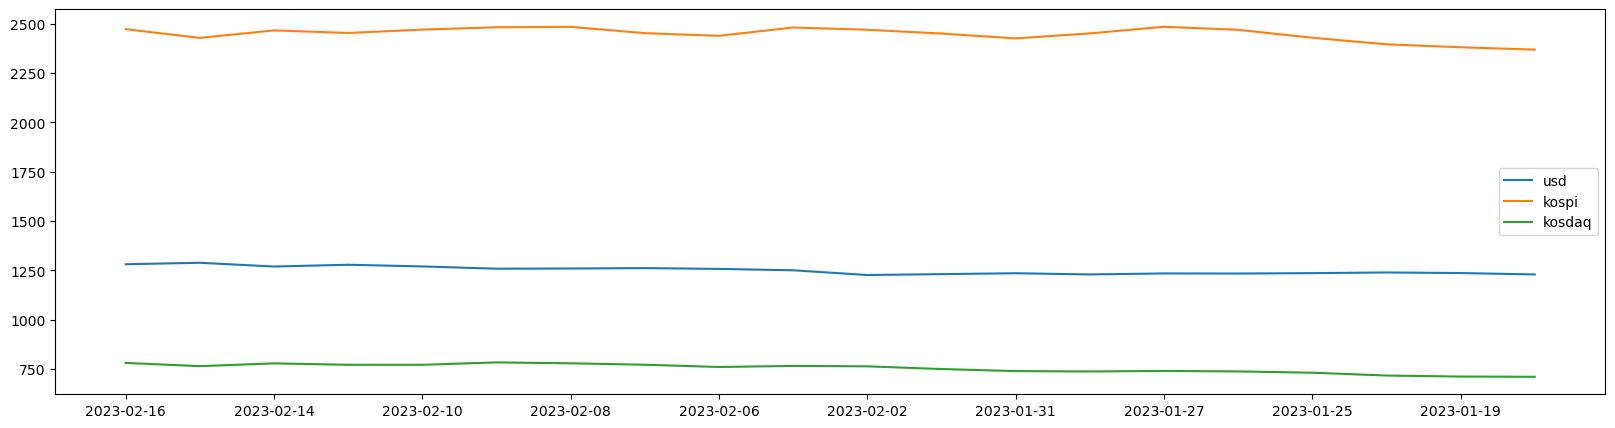

In [80]:
plt.figure(figsize=(20, 5))
plt.plot(df['localTradedAt'], df['usd'], label='usd')
plt.plot(df['localTradedAt'], df['kospi'], label='kospi')
plt.plot(df['localTradedAt'], df['kosdaq'], label='kosdaq')
plt.xticks(df['localTradedAt'][::2])
plt.legend()
plt.show()

#### 7. 데이터 스케일링
- min max scaling


- $z = \frac{x_i - min(x)}{max(x) - min(x)} (0 \leqq z \leqq 1)$


- latex syntax : `https://jjycjnmath.tistory.com/117`

In [81]:
from sklearn.preprocessing import minmax_scale

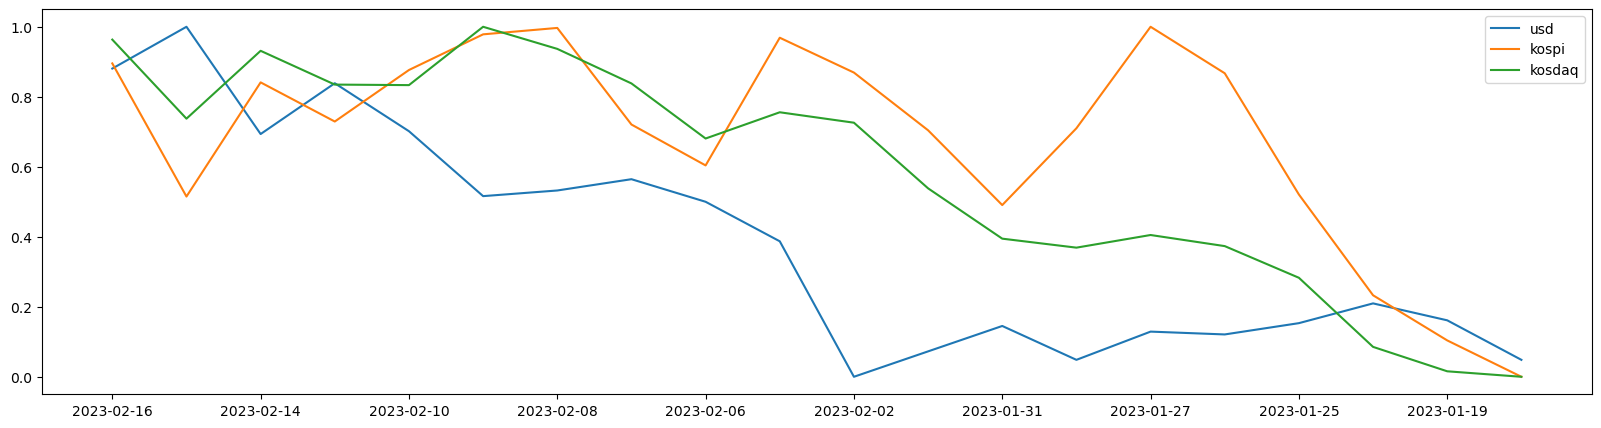

In [82]:
plt.figure(figsize=(20, 5))
plt.plot(df['localTradedAt'], minmax_scale(df['usd']), label='usd')
plt.plot(df['localTradedAt'], minmax_scale(df['kospi']), label='kospi')
plt.plot(df['localTradedAt'], minmax_scale(df['kosdaq']), label='kosdaq')
plt.xticks(df['localTradedAt'][::2])
plt.legend()
plt.show()

#### 8. 상관관계 분석
- 피어슨 상관계수(Pearson Correlation Coefficient)
- 두 데이터 집합의 상관도를 분석할때 사용되는 지표
- 상관계수의 해석
    - -1에 가까울수록 서로 반대방향으로 움직임
    - 1에 가까울수록 서로 같은방향으로 움직임
    - 0에 가까울수록 두 데이터는 관계가 없음

In [83]:
df.corr()

,usd,kospi,kosdaq
usd,1.000000,0.293540,0.719686
kospi,0.293540,1.000000,0.779625
kosdaq,0.719686,0.779625,1.000000
